# ML assignment1

## You are given house_price.csv which contains property prices in the city of Bangalore. You need to examine price per square feet do the following:

### Q1. Perform basic EDA

In [1]:
# immporting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# loading the dataset
file_path = "C:\\Users\\HP\\Downloads\\house_price.csv"
df = pd.read_csv(file_path)
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


In [5]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [6]:
# cheaking for missing values
print(df.isnull().sum())


location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64


In [16]:
df.dtypes

location           object
size               object
total_sqft        float64
bath              float64
price             float64
bhk                 int64
price_per_sqft      int64
dtype: object

In [7]:
#summery statistics
df.describe()


,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [22]:
# Convert categorical columns to numeric
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category').cat.codes

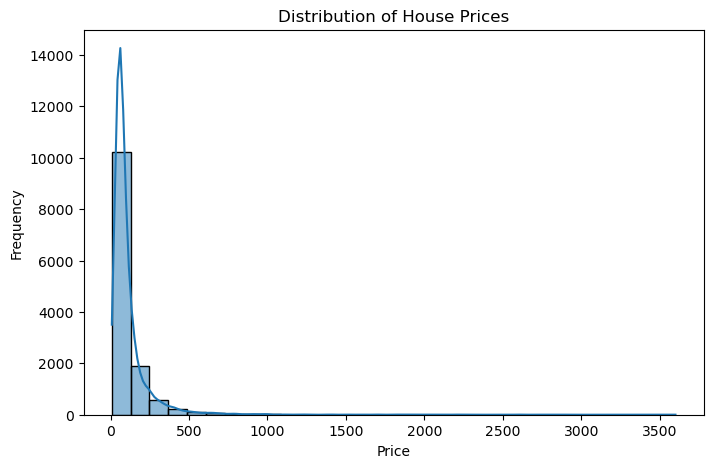

In [23]:
# Distribution of house prices
plt.figure(figsize=(8, 5))
sns.histplot(df['price'], bins=30, kde=True)
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

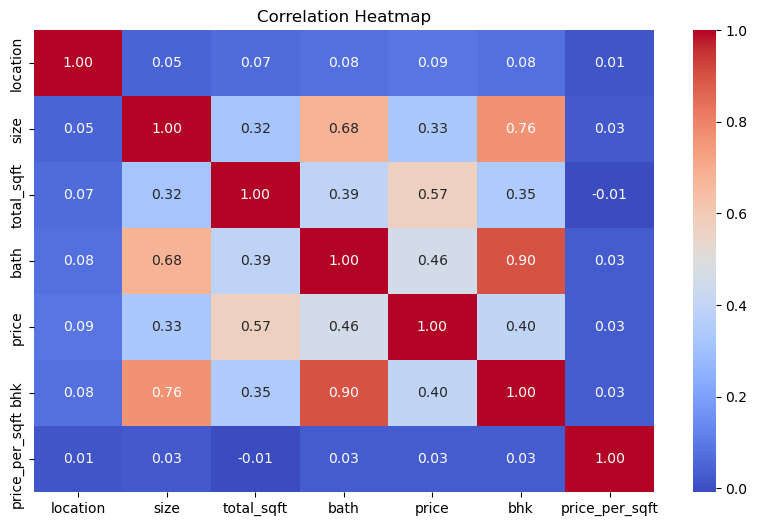

In [24]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


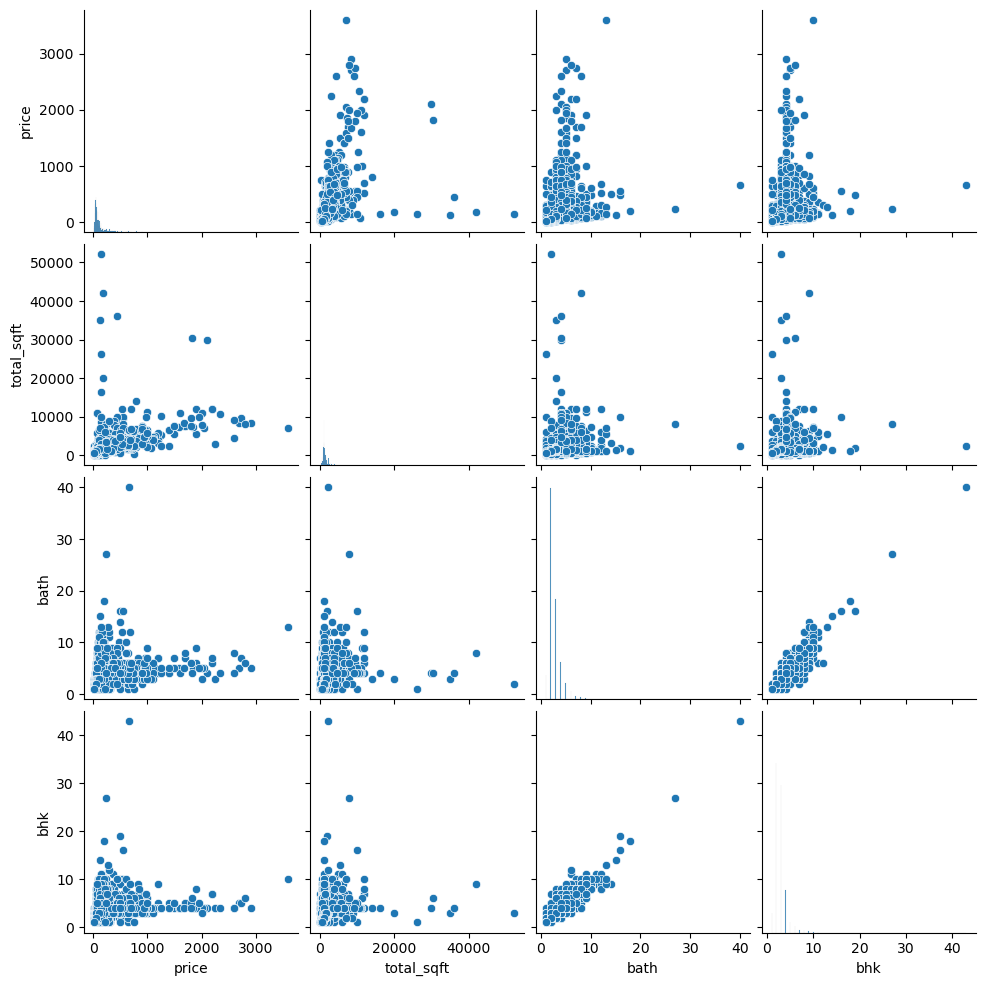

In [29]:
# Pairplot for key variables
sns.pairplot(df[['price', 'total_sqft', 'bath', 'bhk']])
plt.show()

### Q2. Detect the outliers using following methods and remove it using methods like trimming / capping/ imputation using mean or median
a) Mean and Standard deviation 
b)Percentile method
c) IQR(Inter quartile range method) 
d) Z Score method 

In [ ]:
# Detect and remove outliers using different methods

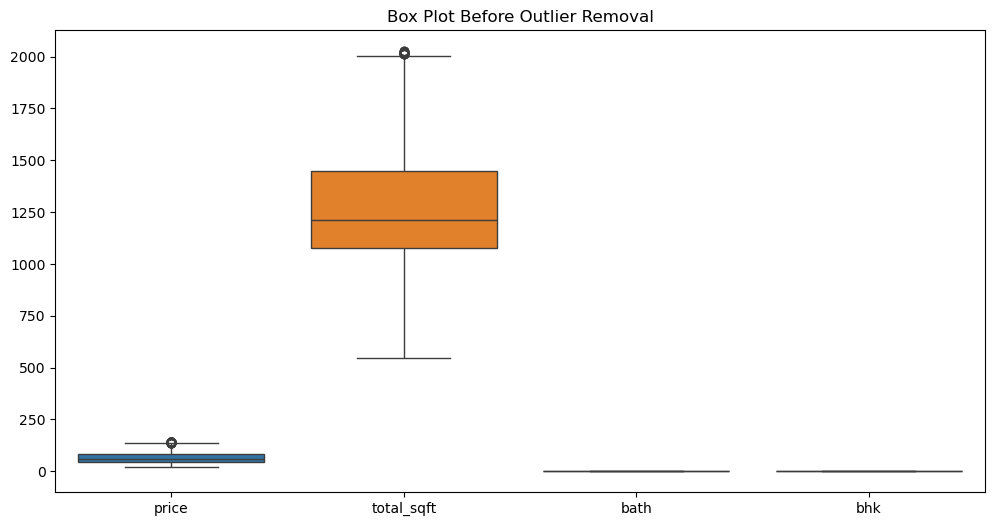

In [43]:
# Create box plots before outlier removal
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['price', 'total_sqft', 'bath', 'bhk']])
plt.title("Box Plot Before Outlier Removal")
plt.show()


In [46]:
# Outlier Removal using different methods
outlier_methods = {}

In [47]:
# a) Mean and Standard Deviation
mean_std_df = df.copy()
for col in ['price', 'total_sqft', 'bath', 'bhk']:
    mean = mean_std_df[col].mean()
    std = mean_std_df[col].std()
    lower_bound, upper_bound = mean - 3 * std, mean + 3 * std
    mean_std_df = mean_std_df[(mean_std_df[col] >= lower_bound) & (mean_std_df[col] <= upper_bound)]
outlier_methods['Mean & Std'] = mean_std_df


In [48]:
# b) Percentile method
percentile_df = df.copy()
for col in ['price', 'total_sqft', 'bath', 'bhk']:
    lower_bound, upper_bound = percentile_df[col].quantile([0.01, 0.99])
    percentile_df = percentile_df[(percentile_df[col] >= lower_bound) & (percentile_df[col] <= upper_bound)]
outlier_methods['Percentile'] = percentile_df


In [49]:
# c) IQR (Interquartile Range) Method
iqr_df = df.copy()
for col in ['price', 'total_sqft', 'bath', 'bhk']:
    Q1, Q3 = iqr_df[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_bound, upper_bound = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    iqr_df = iqr_df[(iqr_df[col] >= lower_bound) & (iqr_df[col] <= upper_bound)]
outlier_methods['IQR'] = iqr_df


In [50]:
# d) Z-Score Method
zscore_df = df.copy()
for col in ['price', 'total_sqft', 'bath', 'bhk']:
    zscore_df = zscore_df[(np.abs(stats.zscore(zscore_df[col])) < 3)]
outlier_methods['Z-Score'] = zscore_df

### Q3. Create a box plot and use this to determine which method seems to work best to remove outliers for this data?

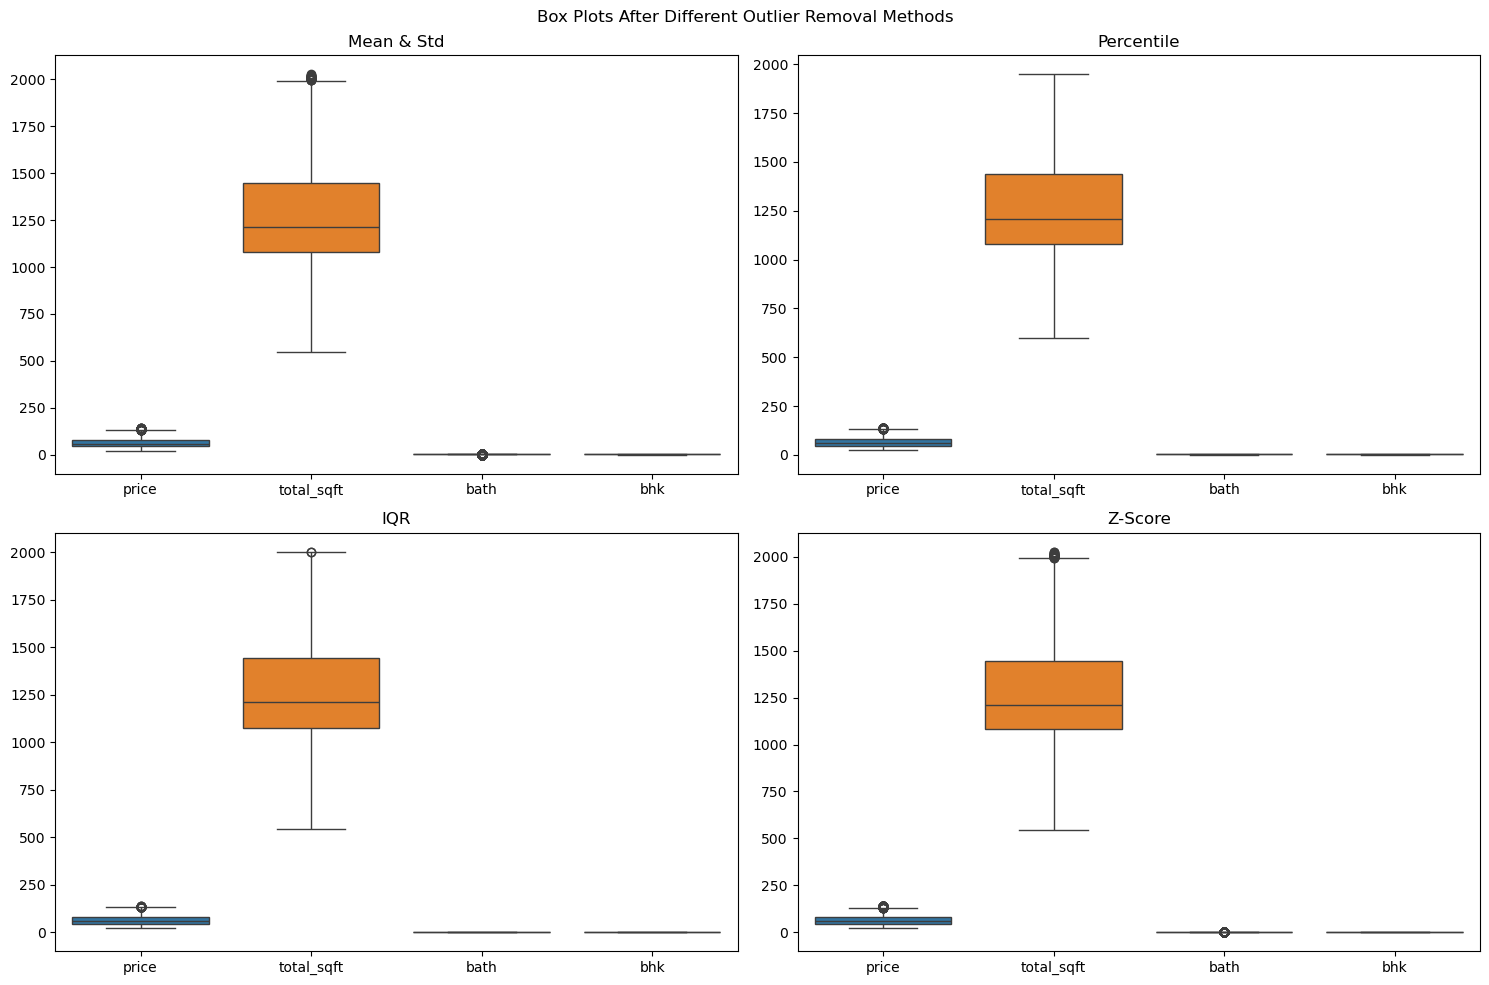

In [51]:
# Create box plots after outlier removal
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle("Box Plots After Different Outlier Removal Methods")

for ax, (method, data) in zip(axes.flatten(), outlier_methods.items()):
    sns.boxplot(data=data[['price', 'total_sqft', 'bath', 'bhk']], ax=ax)
    ax.set_title(method)

plt.tight_layout()
plt.show()

from the box plot percentile metod seems work best to remove outliers for this data

### Q4. Draw histplot to check the normality of the column(price per sqft column) and perform transformations if needed. Check the skewness and kurtosis before and after the transformation.

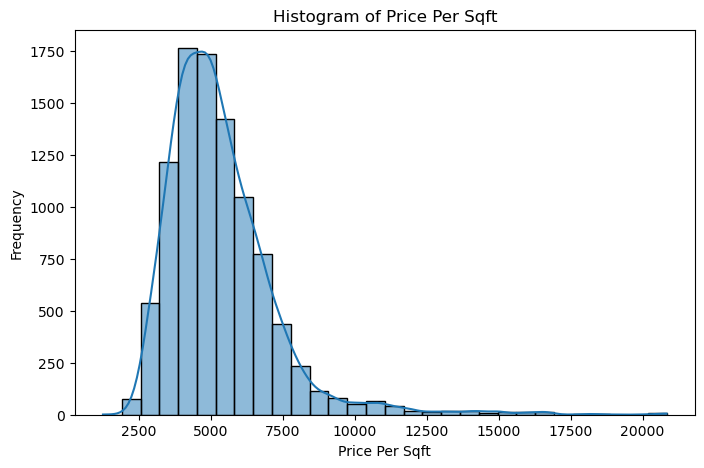

In [52]:
# Check Normality of Price per Sqft
plt.figure(figsize=(8, 5))
sns.histplot(df['price_per_sqft'], bins=30, kde=True)
plt.title('Histogram of Price Per Sqft')
plt.xlabel('Price Per Sqft')
plt.ylabel('Frequency')
plt.show()


In [53]:
# Skewness and Kurtosis before transformation
print("\nSkewness before transformation:", df['price_per_sqft'].skew())
print("Kurtosis before transformation:", df['price_per_sqft'].kurtosis())



Skewness before transformation: 2.291583036248045
Kurtosis before transformation: 9.83200721945456


In [54]:
# Log Transformation
df['price_per_sqft_log'] = np.log1p(df['price_per_sqft'])


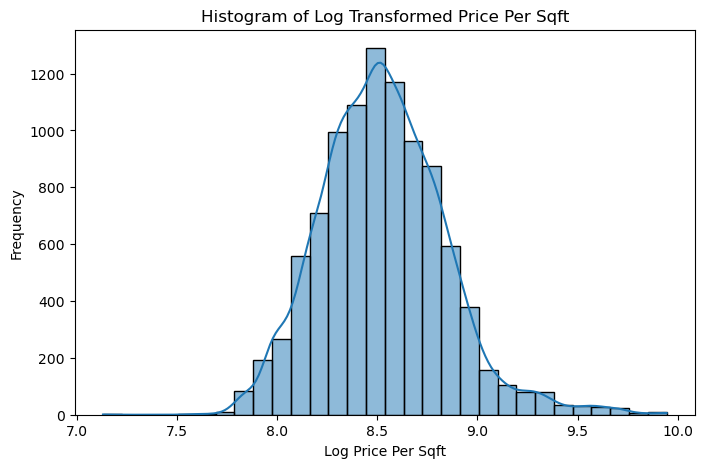

In [55]:
# Check Normality after Transformation
plt.figure(figsize=(8, 5))
sns.histplot(df['price_per_sqft_log'], bins=30, kde=True)
plt.title('Histogram of Log Transformed Price Per Sqft')
plt.xlabel('Log Price Per Sqft')
plt.ylabel('Frequency')
plt.show()

In [56]:
# Skewness and Kurtosis after transformation
print("\nSkewness after transformation:", df['price_per_sqft_log'].skew())
print("Kurtosis after transformation:", df['price_per_sqft_log'].kurtosis())


Skewness after transformation: 0.5411846286739265
Kurtosis after transformation: 1.0804353939520057


### Q5. Check the correlation between all the numerical columns and plot heatmap.

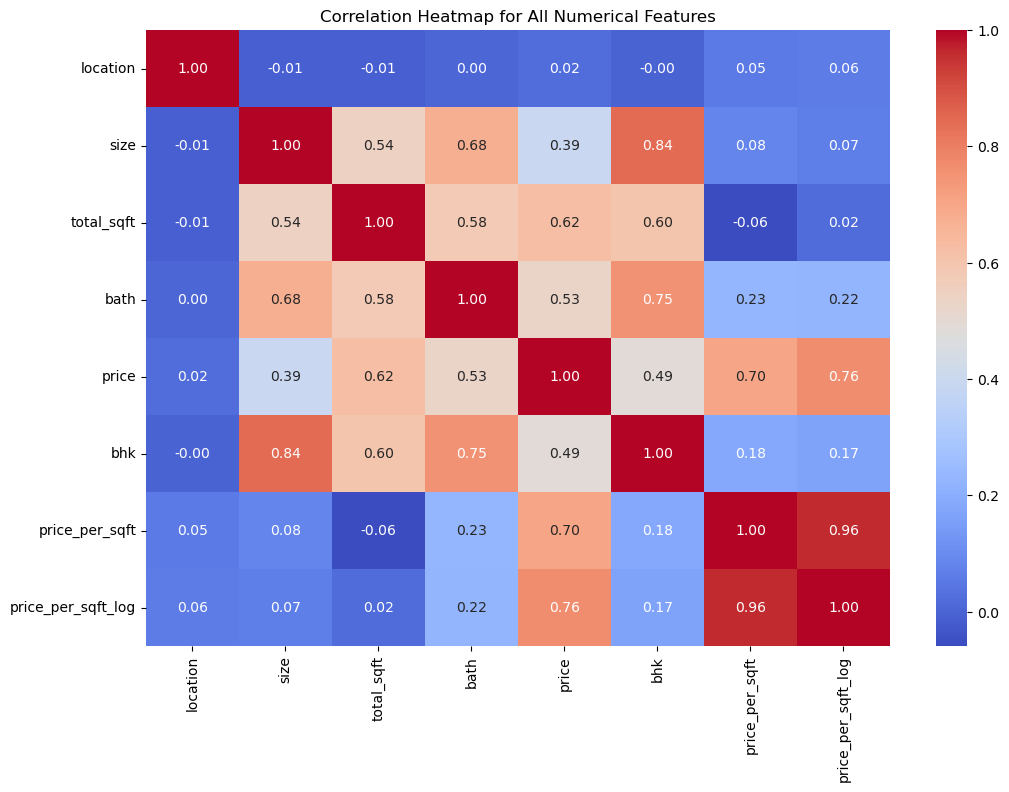

In [57]:
# Correlation heatmap for all numerical features
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for All Numerical Features')
plt.show()

Strong Positive Correlation Between Price and Sqft:

The price of a house is highly correlated with the square footage, indicating that larger houses tend to be more expensive.
Moderate to Strong Correlation Between Price and Bathrooms/Bedrooms:

The number of bedrooms and bathrooms also show a positive correlation with price, but it is lower than that of square footage, suggesting that while more rooms contribute to a higher price, square footage has a stronger impact.
Price per Sqft vs Price:

The correlation between price and price per square foot is lower than expected. This might be due to variations in property values across different locations or differences in construction quality.
Multicollinearity Consideration:

High correlation between sqft, bedrooms, and bathrooms suggests multicollinearity, which could impact regression models. Feature selection techniques may be needed to avoid redundancy.
Weak or No Correlation with Some Features:

Certain numerical features might show very weak or no correlation with price, indicating they have minimal influence on property values.

### Q6. Draw Scatter plot between the variables to check the correlation between them.

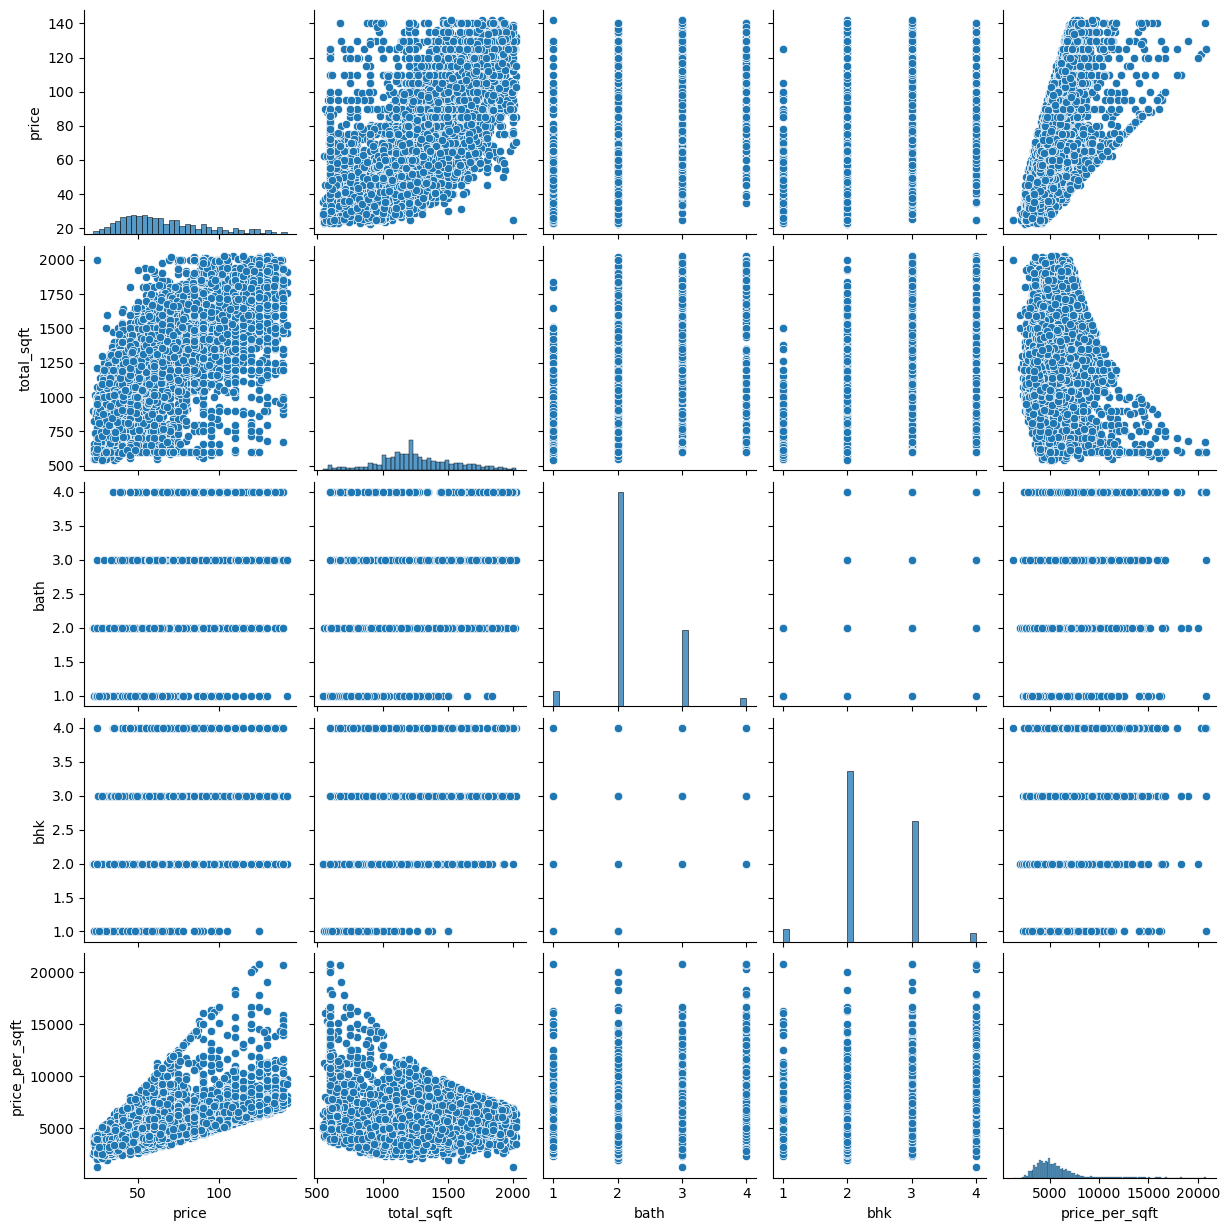

In [58]:
# Scatter plot to check correlation between variables
sns.pairplot(df[['price', 'total_sqft', 'bath', 'bhk', 'price_per_sqft']])
plt.show()

Strong Positive Correlation Between Price and Sqft

The scatter plot between price and sqft shows a clear upward trend, confirming that larger houses tend to be more expensive.
Price vs Bedrooms/Bathrooms

The plots for price vs bedrooms and price vs bathrooms show a positive relationship but with more scattered points. This suggests that while the number of bedrooms and bathrooms influences price, other factors also contribute.
Sqft vs Bedrooms/Bathrooms

There is a visible correlation between sqft and bedrooms/bathrooms, indicating that larger homes generally have more rooms.
Price Per Sqft vs Price

The scatter plot shows a weak correlation between price_per_sqft and price. This could mean that price per square foot varies significantly across locations.
Outliers Observed

The scatter plots show some extreme values, especially in price and sqft. These might be luxury properties or data entry errors and should be examined further.

In [60]:
print("\nData after preprocessing:")
print(df.head())


Data after preprocessing:
   location  size  total_sqft  bath  price  bhk  price_per_sqft  \
0        79    13      1056.0   2.0  39.07    2            3699   
2       225    16      1440.0   2.0  62.00    3            4305   
3       159    16      1521.0   3.0  95.00    3            6245   
4       151    13      1200.0   2.0  51.00    2            4250   
5       234    13      1170.0   2.0  38.00    2            3247   

   price_per_sqft_log  
0            8.216088  
2            8.367765  
3            8.739697  
4            8.354910  
5            8.085795  
